In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [11]:
# i0 = 1.2 * (10**-3)
i0 = 2.55
alpha = 2
F = 96485
R = 8.314
T = 298


#Ciref = 10**-3
CO = 0.26 #mol/m3
CR = (10**-4)

# Eeq = 0.203 - ((R*T)/(n*F))*np.log(CR/CO)
Eeq = 0.203 
# Ect = np.array([-1.1,-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9,1.1])
Ect = -1.1
OV = -0.075
# OV = Ect-Eeq

step = 10 #2 minutes
time_step = np.arange(0,60.001*60,step)

concO2 = np.array([0.26])
concOH = np.array([10**-4])

current = np.array([0])
O2_limit = 10**-20


In [13]:
for i,t in enumerate(time_step):
    if i == len(time_step) - 1:
        break
    
    # Make this a function
    iloc = i0*((concOH[i]*np.exp((alpha*F*OV)/(R*T))) - (concO2[i]*np.exp((-(alpha)*F*OV)/(R*T))))
    RO2 = -1*abs(iloc)/(F*4) #Rate of O2 consumption
    #print (RO2)
    print(t)
    ROH = 4*abs(iloc)/(F*4) #Rate of OH production
    newCurrent = iloc*0.0104
    current = np.append(current, newCurrent)
    #Concentration of oxygen
    new_concO2 = (RO2*step) + concO2[i] #Nerst equation to calculate new concentration
    if new_concO2 <= O2_limit:
        concO2 = np.append(concO2, min(concO2))
        
        #Calculate the New conc of OH based on O2_limit
        concOH = np.append(concOH, max(concOH))
    else:
        concO2 = np.append(concO2, new_concO2)
        #Concentration of hydroxide
        new_concOH = (ROH*step) + concOH[i]
        concOH = np.append(concOH, new_concOH)
    

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
300.0
310.0
320.0
330.0
340.0
350.0
360.0
370.0
380.0
390.0
400.0
410.0
420.0
430.0
440.0
450.0
460.0
470.0
480.0
490.0
500.0
510.0
520.0
530.0
540.0
550.0
560.0
570.0
580.0
590.0
600.0
610.0
620.0
630.0
640.0
650.0
660.0
670.0
680.0
690.0
700.0
710.0
720.0
730.0
740.0
750.0
760.0
770.0
780.0
790.0
800.0
810.0
820.0
830.0
840.0
850.0
860.0
870.0
880.0
890.0
900.0
910.0
920.0
930.0
940.0
950.0
960.0
970.0
980.0
990.0
1000.0
1010.0
1020.0
1030.0
1040.0
1050.0
1060.0
1070.0
1080.0
1090.0
1100.0
1110.0
1120.0
1130.0
1140.0
1150.0
1160.0
1170.0
1180.0
1190.0
1200.0
1210.0
1220.0
1230.0
1240.0
1250.0
1260.0
1270.0
1280.0
1290.0
1300.0
1310.0
1320.0
1330.0
1340.0
1350.0
1360.0
1370.0
1380.0
1390.0
1400.0
1410.0
1420.0
1430.0
1440.0
1450.0
1460.0
1470.0
1480.0
1490.0
1500.0
1510.0
1520.0
1530.0
1540.0
1550.0
1560.0
1570.0
1580.

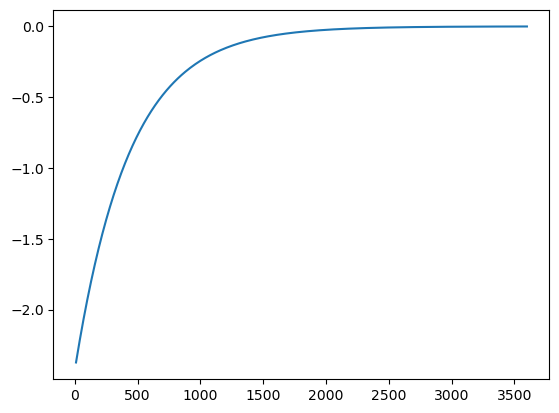

In [4]:
plt.plot(time_step[1:],current[1:])

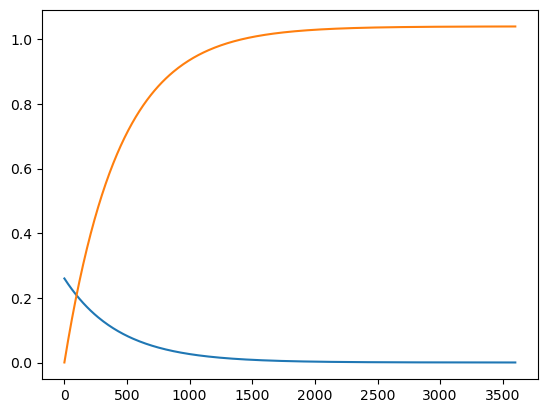

In [5]:
plt.plot(time_step,concO2,time_step,concOH)

In [ ]:
DO2= 2.9e-9 #m2/s
step_x = 10 #2 minutes
x_step = np.arange(0,60.001*60,step_x)
for i,t in enumerate(time_step):
    for j,x in enumerate(x_step):
        cO2[i,j]= R(x_step)**2/DO2 + cO2[i,j-1]
        
        
    

0.10498161559888579


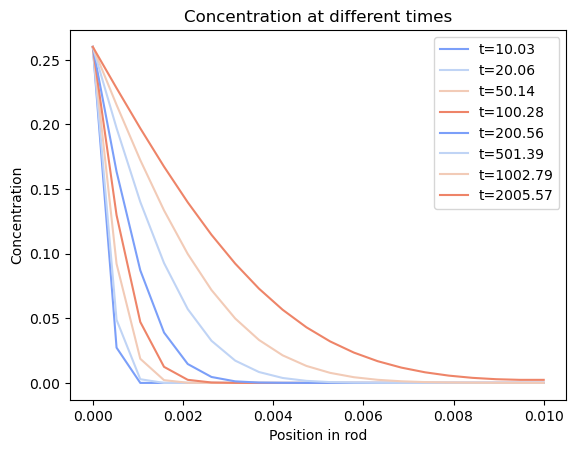

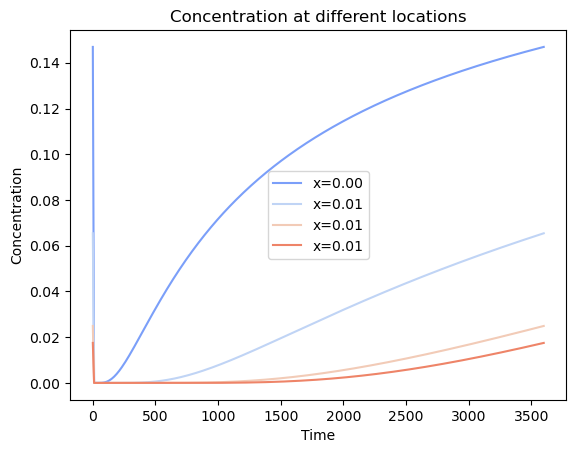

In [17]:
N = 20  # number of points to discretize
L = 0.01
X = np.linspace(0, L, N)  # position along the rod
h = L / (N - 1)  # discretization spacing

C0t = 0.26  # concentration at x = 0
D = 2.9*10**-9  # Diffusivity.  (Try increasing this to 0.028 or higher....)

tfinal = 3600
Ntsteps = 360
dt = tfinal / (Ntsteps-1)
t = np.linspace(0, tfinal, Ntsteps)

alpha = D * dt / h**2
print(alpha)

C_xt = []  # container for all the time steps
R=0.0005914625586516863
# initial condition at t = 0
C = np.zeros(X.shape)
C[0] = C0t

C_xt += [C]

for j in range(1, Ntsteps):
    N = np.zeros(C.shape)
    N[0] = C0t
    N[1:-1] = alpha * C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[0:-2] #+ (R*Ntsteps)
    N[-1] = N[-2]  # derivative boundary condition flux = 0
    C[:] = N
    C_xt += [N]

    # plot selective solutions
    # sns.set_palette(sns.color_palette("coolwarm",10))
    if j in [1, 2, 5, 10, 20, 50, 100, 200, 500]:
        plt.plot(X, N, label="t={0:1.2f}".format(t[j]))

plt.xlabel("Position in rod")
plt.ylabel("Concentration")
plt.title("Concentration at different times")
plt.legend(loc="best")
plt.show()


C_xt = np.array(C_xt)
plt.figure()
# sns.set_palette(sns.color_palette("coolwarm",4))
plt.plot(t, C_xt[:, 5], label="x={0:1.2f}".format(X[5]))
plt.plot(t, C_xt[:, 10], label="x={0:1.2f}".format(X[10]))
plt.plot(t, C_xt[:, 15], label="x={0:1.2f}".format(X[15]))
plt.plot(t, C_xt[:, 19], label="x={0:1.2f}".format(X[19]))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Concentration at different locations")
plt.show()

[   0.          189.47368421  378.94736842  568.42105263  757.89473684
  947.36842105 1136.84210526 1326.31578947 1515.78947368 1705.26315789
 1894.73684211 2084.21052632 2273.68421053 2463.15789474 2652.63157895
 2842.10526316 3031.57894737 3221.05263158 3410.52631579 3600.        ]


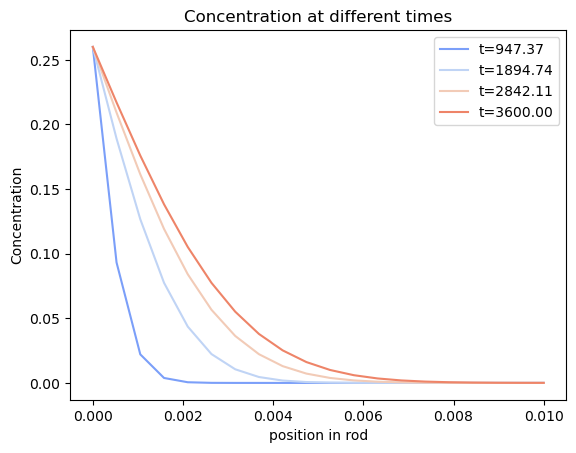

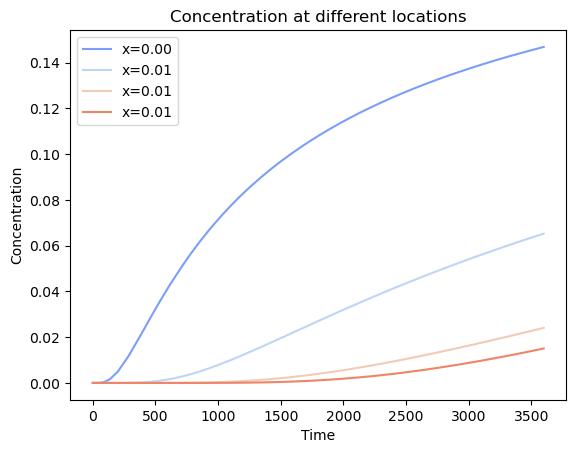

In [8]:
N = 20  # number of points to discretize
L = 0.01  # length of the rod
X = np.linspace(0, L, N)  # position along the rod
h = L / (N - 1)  # discretization spacing

C0t = 0.26  # concentration at x = 0
D = 2.9*10**-9  # Diffusivity

tfinal = 3600.0  # final time
tspan = (0, tfinal)  # time span to integrate over
T=np.linspace(0, tfinal, N)
print(T)
init = np.zeros(N)  # Concentration in reactor at t = 0 (initial condition)
init[0] = C0t  # concentration at entrance
alpha = D / h ** 2

def method_of_lines(t, C):
    """
    coupled ODES at each node point.

    Takes a vector of C values (one at each of the N volume elements).
    Returns a vector of dC/dt values
    """
    dCdt = np.zeros_like(C)
    for i in range(1, N-1):
        dCdt[i] = alpha * (C[i + 1] - 2 * C[i] + C[i - 1])
    dCdt[-1] = alpha * (2 * C[N - 2] - 2 * C[N - 1])
    return dCdt

sol = solve_ivp(method_of_lines, tspan, init)
t = sol.t
C_xt = sol.y
C_xt = np.array(C_xt)


# plot selective solutions
sns.set_palette(sns.color_palette("coolwarm", 4))
plt.plot(X, C_xt[:, 5], label="t={0:1.2f}".format(T[5]))
plt.plot(X, C_xt[:, 10], label="t={0:1.2f}".format(T[10]))
plt.plot(X, C_xt[:, 15], label="t={0:1.2f}".format(T[15]))
plt.plot(X, C_xt[:, 19], label="t={0:1.2f}".format(T[19]))
plt.legend(loc="best")
plt.xlabel("position in rod")
plt.ylabel("Concentration")
plt.title("Concentration at different times")
plt.show()

# plot selective solutions
sns.set_palette(sns.color_palette("coolwarm", 4))
plt.plot(t, C_xt[5, :], label="x={0:1.2f}".format(X[5]))
plt.plot(t, C_xt[10, :], label="x={0:1.2f}".format(X[10]))
plt.plot(t, C_xt[15, :], label="x={0:1.2f}".format(X[15]))
plt.plot(t, C_xt[19, :], label="x={0:1.2f}".format(X[19]))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Concentration at different locations")
plt.show()
